In [7]:
# Data Import and Manipulation:
import pandas as pd
import numpy as np
import yfinance as yf

# Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns



# Data Splitting and Validation:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Regression Models:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Metrics:
from sklearn.metrics import r2_score, mean_squared_error

# Statistical Analysis:
import itertools
from itertools import combinations
from scipy.stats import pearsonr

In [8]:
# Read the dataset
data = pd.read_csv('Dabur Daily.csv')
data.head()

,Unnamed: 0,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity
0,0,2010-06-18,0.0,0.0,39637.0,0.0000,1,negative
1,1,2010-11-02,0.0,0.0,225.0,0.0000,1,negative
2,2,2010-11-17,0.0,0.0,242.0,-0.3182,1,negative
3,3,2010-12-29,0.0,0.0,1688.0,-0.2960,1,negative
4,4,2011-01-31,0.0,0.0,38059.0,0.4404,1,positive


In [9]:
# Drop the columns 'Unnamed: 0','Polarity'
daily = data.drop(['Unnamed: 0','Polarity'],axis=1)
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-06-18,0.0,0.0,39637.0,0.0000,1
1,2010-11-02,0.0,0.0,225.0,0.0000,1
2,2010-11-17,0.0,0.0,242.0,-0.3182,1
3,2010-12-29,0.0,0.0,1688.0,-0.2960,1
4,2011-01-31,0.0,0.0,38059.0,0.4404,1


In [10]:
# convert the 'Date' column of a pandas DataFrame named daily to a datetime format
daily['Date'] = pd.to_datetime(daily['Date'])

# set the 'Date' column as the index of the DataFrame
daily = daily.set_index('Date')

In [11]:
daily.head(3)

,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
Date,,,,,
2010-06-18,0.0,0.0,39637.0,0.0000,1
2010-11-02,0.0,0.0,225.0,0.0000,1
2010-11-17,0.0,0.0,242.0,-0.3182,1


In [12]:
data.isnull().sum()

Unnamed: 0                   0
Date                         0
Like Count                   0
Retweet Count                0
Follower Count               0
Daily_Avg_Sentiment_Score    1
Tweet Volume                 0
Polarity                     0
dtype: int64

In [13]:
data.dropna(inplace=True)

### WEEKLY TWITTER DATA

In [14]:
# returns the weighted average of the 'Daily_Avg_Sentiment_Score' column by the 'Tweet Volume' column
def weighted_avg(x):
    return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()

# daily DataFrame is resampled on weekly basis using the resample() method with the argument 'W' to indicate weekly frequency
weekly = daily.resample('W').apply(weighted_avg)

C:\Users\HP\AppData\Local\Temp/ipykernel_21848/1129608819.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()


In [15]:
# Convert to dataframe
weekly = pd.DataFrame(weekly)
weekly.head()

,0
Date,
2010-06-20,0.0
2010-06-27,NaN
2010-07-04,NaN
2010-07-11,NaN
2010-07-18,NaN


In [16]:
len(weekly)

668

In [17]:
weekly.dropna(inplace=True)
len(weekly)

524

In [18]:
# Rename the columns '0'
weekly.rename(columns={0: 'Weighted_Avg_Sentiment_Score'}, inplace=True)
weekly.head(3)

,Weighted_Avg_Sentiment_Score
Date,
2010-06-20,0.0000
2010-11-07,0.0000
2010-11-21,-0.3182


In [19]:
# data is resampled at a weekly frequency ('W') and mean value of the 'Follower Count' is calculated for each week 
weekly['Mean Follower Count'] = daily['Follower Count'].resample('W').mean()

#data is resampled at a weekly frequency ('W') and mean value of the 'Like Count' is calculated for each week 
weekly['Mean Like Count'] = daily['Like Count'].resample('W').mean()

# data is resampled at a weekly frequency ('W') and mean value of the 'Retweet Count' is calculated for each week 
weekly['Mean Retweet Count'] = daily['Retweet Count'].resample('W').mean()

# data is resampled at a weekly frequency ('W') and mean value of the 'Tweet Volume' is calculated for each week 
weekly['Weekly Tweet Volume'] = daily['Tweet Volume'].resample('W').mean()

In [20]:
# Column names of the dataframe 'weekly'
weekly.columns

Index(['Weighted_Avg_Sentiment_Score', 'Mean Follower Count',
       'Mean Like Count', 'Mean Retweet Count', 'Weekly Tweet Volume'],
      dtype='object')

In [21]:
weekly.head()

,Weighted_Avg_Sentiment_Score,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume
Date,,,,,
2010-06-20,0.0000,39637.0,0.0,0.0,1.0
2010-11-07,0.0000,225.0,0.0,0.0,1.0
2010-11-21,-0.3182,242.0,0.0,0.0,1.0
2011-01-02,-0.2960,1688.0,0.0,0.0,1.0
2011-02-06,0.4404,38059.0,0.0,0.0,1.0


In [22]:
# calculate the mean sentiment score for each week
weekly['Mean Sentiment Score'] =  daily.resample('W').apply(weighted_avg)

# Drop the repeated column 'Weighted_Avg_Sentiment_Score'
weekly = weekly.drop(columns=['Weighted_Avg_Sentiment_Score'], axis=1)
weekly.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_21848/1129608819.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()


,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score
Date,,,,,
2010-06-20,39637.0,0.0,0.0,1.0,0.0000
2010-11-07,225.0,0.0,0.0,1.0,0.0000
2010-11-21,242.0,0.0,0.0,1.0,-0.3182
2011-01-02,1688.0,0.0,0.0,1.0,-0.2960
2011-02-06,38059.0,0.0,0.0,1.0,0.4404


In [23]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    else:
        return 'Negative'
    
# map the sentiment scores to categories and create a new 'category' column
weekly['Polarity'] = weekly['Mean Sentiment Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
weekly.head()

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
Date,,,,,,
2010-06-20,39637.0,0.0,0.0,1.0,0.0000,Negative
2010-11-07,225.0,0.0,0.0,1.0,0.0000,Negative
2010-11-21,242.0,0.0,0.0,1.0,-0.3182,Negative
2011-01-02,1688.0,0.0,0.0,1.0,-0.2960,Negative
2011-02-06,38059.0,0.0,0.0,1.0,0.4404,Positive


In [24]:
# Get value_counts for each category of "Polarity"
weekly['Polarity'].value_counts()

Positive    421
Negative    103
Name: Polarity, dtype: int64

In [25]:
weekly.isnull().sum()

Mean Follower Count     0
Mean Like Count         0
Mean Retweet Count      0
Weekly Tweet Volume     0
Mean Sentiment Score    0
Polarity                0
dtype: int64

In [26]:
len(weekly)

524

In [27]:
weekly.head()

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
Date,,,,,,
2010-06-20,39637.0,0.0,0.0,1.0,0.0000,Negative
2010-11-07,225.0,0.0,0.0,1.0,0.0000,Negative
2010-11-21,242.0,0.0,0.0,1.0,-0.3182,Negative
2011-01-02,1688.0,0.0,0.0,1.0,-0.2960,Negative
2011-02-06,38059.0,0.0,0.0,1.0,0.4404,Positive


In [29]:
weekly = weekly.reset_index()

In [30]:
# Extract the year from the Date column
weekly['Year'] = weekly['Date'].dt.year

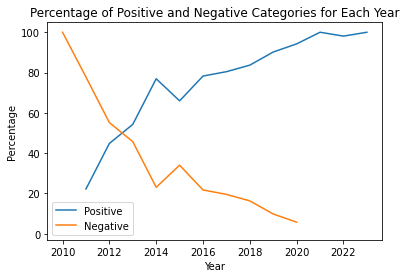

In [31]:
# group the 'maggi' DataFrame by 'Year' and counts the number of tweets in each year using the groupby() and count() methods.
total_counts = weekly.groupby('Year')['Polarity'].count()

# calculates the percentage of positive and negative tweets for each year by filtering the 'maggi' DataFrame based on the 'Polarity' column and applying the groupby() and count() methods
positive_perc = weekly[weekly['Polarity'] == 'Positive'].groupby('Year')['Polarity'].count() / total_counts * 100
negative_perc = weekly[weekly['Polarity'] == 'Negative'].groupby('Year')['Polarity'].count() / total_counts * 100

# Plot the percentages of positive and negative tweets for each year
plt.plot(positive_perc.index, positive_perc.values, label='Positive')
plt.plot(negative_perc.index, negative_perc.values, label='Negative')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Categories for Each Year')
plt.legend()

# Show the plot
plt.show() 

# Negative sentiment is high and positive is low in 2011, 2013 and 2015

In [37]:
positive_perc

Year
2010           NaN
2011     22.222222
2012     44.827586
2013     54.285714
2014     76.923077
2015     65.957447
2016     78.260870
2017     80.434783
2018     83.673469
2019     90.196078
2020     94.230769
2021    100.000000
2022     98.076923
2023    100.000000
Name: Polarity, dtype: float64

### WEEKLY STOCK DATA

In [39]:
# Set the stock ticker and the start and end dates
ticker = "DABUR.NS"
start_date = "2010-01-01"
end_date = "2023-03-28"

# Download the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Convert the index to a datetime object 
data.index = pd.to_datetime(data.index)

# group the data by the week starting on a Sunday
stock = data.groupby(pd.Grouper(freq="W-SUN")).mean()
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-10,82.035001,83.489999,81.050000,82.384999,71.477449,1333708.8
2010-01-17,82.425002,82.700000,80.900000,81.445001,70.661916,808506.4
2010-01-24,80.020000,80.549998,78.675002,79.780000,69.217354,831459.2
2010-01-31,79.137501,80.337500,76.687500,79.075001,68.605701,1633340.5
2010-02-07,82.655000,84.739999,81.850002,83.785001,72.692099,1379446.4


In [40]:
# Only select columns 'Adj Close','Volume'
stock = stock[['Adj Close','Volume']]
stock.head()

,Adj Close,Volume
Date,,
2010-01-10,71.477449,1333708.8
2010-01-17,70.661916,808506.4
2010-01-24,69.217354,831459.2
2010-01-31,68.605701,1633340.5
2010-02-07,72.692099,1379446.4


In [41]:
# resulting object, nestle_yearly, will contain the mean closing prices of Nestle stock for each year in the original data
yearly = stock['Adj Close'].resample(rule='A').mean()

In [42]:
yearly

Date
2010-12-31     82.520633
2011-12-31     90.241523
2012-12-31    101.926492
2013-12-31    138.558030
2014-12-31    180.606844
2015-12-31    249.128636
2016-12-31    258.040386
2017-12-31    279.640757
2018-12-31    367.467694
2019-12-31    415.595371
2020-12-31    474.334865
2021-12-31    560.648251
2022-12-31    547.023246
2023-12-31    544.647679
Freq: A-DEC, Name: Adj Close, dtype: float64

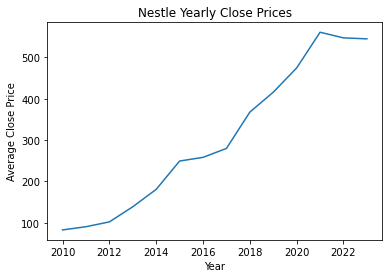

In [43]:
# create a line plot of the resampled Nestle stock closing prices
plt.plot(yearly.index.year, yearly.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Nestle Yearly Close Prices')
plt.show() 

# There was minor decrease in stock value in 2015 correspoding to the negative sentiment.
# No significant decrease can be noted otherwise

In [44]:
# calculate the difference between the adjusted closing price of the current week and the previous week
stock['Price Difference'] = stock['Adj Close'].diff()

# remove any rows that contain missing values
stock.dropna(inplace=True)

# assign values to represent a rising or falling stock trend
Rise = 1
Fall = 0

# If the Price Difference value is greater than zero, the Stock Trend value is set to Rise (i.e. 1), otherwise it is set to Fall (i.e. 0).
stock['Stock Trend'] = np.where(stock['Price Difference']>0, Rise, Fall)
stock.head()

,Adj Close,Volume,Price Difference,Stock Trend
Date,,,,
2010-01-17,70.661916,808506.4,-0.815533,0
2010-01-24,69.217354,831459.2,-1.444562,0
2010-01-31,68.605701,1633340.5,-0.611652,0
2010-02-07,72.692099,1379446.4,4.086398,1
2010-02-14,76.050806,1976834.5,3.358707,1


In [45]:
stock = stock.reset_index()

stock.head()

,Date,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,70.661916,808506.4,-0.815533,0
1,2010-01-24,69.217354,831459.2,-1.444562,0
2,2010-01-31,68.605701,1633340.5,-0.611652,0
3,2010-02-07,72.692099,1379446.4,4.086398,1
4,2010-02-14,76.050806,1976834.5,3.358707,1


### COMBINED DATA

In [46]:
weekly.head()

,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year
0,2010-06-20,39637.0,0.0,0.0,1.0,0.0000,Negative,2010
1,2010-11-07,225.0,0.0,0.0,1.0,0.0000,Negative,2010
2,2010-11-21,242.0,0.0,0.0,1.0,-0.3182,Negative,2010
3,2011-01-02,1688.0,0.0,0.0,1.0,-0.2960,Negative,2011
4,2011-02-06,38059.0,0.0,0.0,1.0,0.4404,Positive,2011


In [47]:
weekly = weekly.reset_index() 

# Convert the 'Date' column to datetime format
weekly['Date'] = pd.to_datetime(weekly['Date'])

# Remove timezone information
weekly['Date'] = weekly['Date'].dt.tz_localize(None)

In [48]:
weekly.head()

,index,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year
0,0,2010-06-20,39637.0,0.0,0.0,1.0,0.0000,Negative,2010
1,1,2010-11-07,225.0,0.0,0.0,1.0,0.0000,Negative,2010
2,2,2010-11-21,242.0,0.0,0.0,1.0,-0.3182,Negative,2010
3,3,2011-01-02,1688.0,0.0,0.0,1.0,-0.2960,Negative,2011
4,4,2011-02-06,38059.0,0.0,0.0,1.0,0.4404,Positive,2011


In [49]:
# merge the 'weekly' dataframe with the 'stock' dataframe on the common column 'Date'
data = pd.merge(weekly, stock, on='Date')

# length of the merged dataframe data
print(len(data))

data.head(3)

524


,index,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year,Adj Close,Volume,Price Difference,Stock Trend
0,0,2010-06-20,39637.0,0.0,0.0,1.0,0.0000,Negative,2010,82.088237,448244.80,-1.613748,0
1,1,2010-11-07,225.0,0.0,0.0,1.0,0.0000,Negative,2010,87.095156,807459.75,-2.094397,0
2,2,2010-11-21,242.0,0.0,0.0,1.0,-0.3182,Negative,2010,84.243177,3227975.25,-2.746671,0


In [50]:
# map the values in the "Polarity" column from "Positive" to 1 and "Negative" to 0.
data["Polarity"] = data["Polarity"].map({"Positive": 1, "Negative": 0})
data.head(3)

,index,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year,Adj Close,Volume,Price Difference,Stock Trend
0,0,2010-06-20,39637.0,0.0,0.0,1.0,0.0000,0,2010,82.088237,448244.80,-1.613748,0
1,1,2010-11-07,225.0,0.0,0.0,1.0,0.0000,0,2010,87.095156,807459.75,-2.094397,0
2,2,2010-11-21,242.0,0.0,0.0,1.0,-0.3182,0,2010,84.243177,3227975.25,-2.746671,0


In [51]:
data = data.set_index('Date')
data.head(3)

,index,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Year,Adj Close,Volume,Price Difference,Stock Trend
Date,,,,,,,,,,,,
2010-06-20,0,39637.0,0.0,0.0,1.0,0.0000,0,2010,82.088237,448244.80,-1.613748,0
2010-11-07,1,225.0,0.0,0.0,1.0,0.0000,0,2010,87.095156,807459.75,-2.094397,0
2010-11-21,2,242.0,0.0,0.0,1.0,-0.3182,0,2010,84.243177,3227975.25,-2.746671,0


<AxesSubplot:>

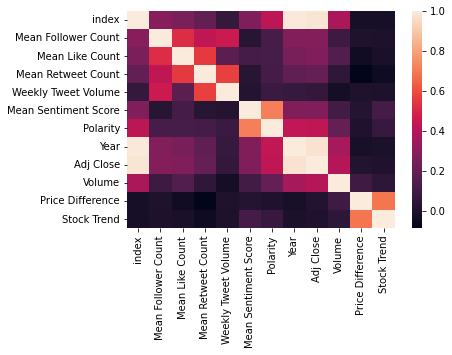

In [52]:
# compute the correlation between all pairs of variables in the data
corr  = data.corr()

# heatmap visualization of the correlation matrix
sns.heatmap(corr)

In [53]:
print(corr)

                         index  Mean Follower Count  Mean Like Count  \
index                 1.000000             0.286545         0.252690   
Mean Follower Count   0.286545             1.000000         0.517260   
Mean Like Count       0.252690             0.517260         1.000000   
Mean Retweet Count    0.186448             0.425731         0.550466   
Weekly Tweet Volume   0.064952             0.454967         0.171527   
Mean Sentiment Score  0.262283             0.028552         0.111283   
Polarity              0.421582             0.118845         0.116557   
Year                  0.992973             0.270634         0.247357   
Adj Close             0.979811             0.275050         0.264391   
Volume                0.372046             0.090219         0.146284   
Price Difference     -0.018087             0.000034        -0.037527   
Stock Trend          -0.018559            -0.002301        -0.011824   

                      Mean Retweet Count  Weekly Tweet Volume  

In [54]:
data.isnull().sum()

index                   0
Mean Follower Count     0
Mean Like Count         0
Mean Retweet Count      0
Weekly Tweet Volume     0
Mean Sentiment Score    0
Polarity                0
Year                    0
Adj Close               0
Volume                  0
Price Difference        0
Stock Trend             0
dtype: int64

In [55]:
len(data)

524

In [56]:
data.dropna(inplace=True)

In [57]:
# calculate the Pearson correlation coefficient and p-value between all possible pairs of variables in the data DataFrame for which the p-value is less than 0.05

variables = ["Mean Follower Count", "Mean Like Count", "Mean Retweet Count", "Mean Sentiment Score", "Polarity", "Adj Close", "Volume", "Price Difference", "Stock Trend"]

correlations = []
# iterate over all combinations of variables
for var1, var2 in itertools.combinations(variables, 2):
    corr_coef, p_value = pearsonr(data[var1], data[var2])
    if p_value < 0.05:
        correlations.append((var1, var2, corr_coef, p_value))

# sort the output in descending order based on the correlation coefficient
correlations_sorted = sorted(correlations, key=lambda x: x[2], reverse=True)

# print the sorted output
for var1, var2, corr_coef, p_value in correlations_sorted:
    print(f"{var1} and {var2}: correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.2f}")

Mean Sentiment Score and Polarity: correlation coefficient = 0.71, p-value = 0.00
Price Difference and Stock Trend: correlation coefficient = 0.69, p-value = 0.00
Mean Like Count and Mean Retweet Count: correlation coefficient = 0.55, p-value = 0.00
Mean Follower Count and Mean Like Count: correlation coefficient = 0.52, p-value = 0.00
Mean Follower Count and Mean Retweet Count: correlation coefficient = 0.43, p-value = 0.00
Polarity and Adj Close: correlation coefficient = 0.43, p-value = 0.00
Adj Close and Volume: correlation coefficient = 0.40, p-value = 0.00
Mean Follower Count and Adj Close: correlation coefficient = 0.28, p-value = 0.00
Mean Like Count and Adj Close: correlation coefficient = 0.26, p-value = 0.00
Mean Sentiment Score and Adj Close: correlation coefficient = 0.26, p-value = 0.00
Mean Retweet Count and Adj Close: correlation coefficient = 0.20, p-value = 0.00
Polarity and Volume: correlation coefficient = 0.20, p-value = 0.00
Mean Like Count and Volume: correlation

# MODEL BUILDING (for Adj. CLose Price using Twitter data only)

### RANDOM FOREST

In [58]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the regressor to the training data
rf.fit(X_train, y_train)

# get the feature importances
importances = rf.feature_importances_

# create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# display the feature importances
print(feature_importances)

                Feature  Importance
1       Mean Like Count    0.653817
3   Weekly Tweet Volume    0.160506
0   Mean Follower Count    0.077988
4  Mean Sentiment Score    0.067467
2    Mean Retweet Count    0.035960
5              Polarity    0.004262


In [59]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = rf.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_rf = results_df_rf.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_rf = results_df_rf.reset_index(drop=True)

In [60]:
results_df_rf.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.742599,83.843336,0.163350
1,"(Mean Follower Count, Mean Like Count, Mean Re...",0.740859,84.126284,0.163901
2,"(Mean Follower Count, Mean Like Count, Mean Re...",0.740212,84.231216,0.164106
3,"(Mean Follower Count, Mean Like Count, Mean Re...",0.733129,85.371810,0.166328
4,"(Mean Follower Count, Mean Like Count, Weekly ...",0.730873,85.731912,0.167030
5,"(Mean Follower Count, Mean Like Count, Weekly ...",0.729716,85.915961,0.167388
6,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.728925,86.041561,0.167633
7,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.728810,86.059799,0.167668
8,"(Mean Like Count, Weekly Tweet Volume, Polarity)",0.728647,86.085620,0.167719
9,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.726643,86.402946,0.168337


In [61]:
results_df_rf.iloc[0]['X_combinations'] # this pair of variables has the highest r2_score in Random Forest

('Mean Like Count', 'Mean Retweet Count', 'Weekly Tweet Volume', 'Polarity')

### GRADIENT BOOSTING REGRESSOR

In [62]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = gbr.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_gbr = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_gbr = results_df_gbr.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_gbr = results_df_gbr.reset_index(drop=True)

In [63]:
results_df_gbr.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.734371,85.172843,0.165940
1,"(Mean Follower Count, Mean Like Count, Mean Re...",0.730368,85.812205,0.167186
2,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.728738,86.071253,0.167691
3,"(Mean Follower Count, Mean Like Count, Mean Re...",0.726226,86.468849,0.168465
4,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.720399,87.384268,0.170249
5,"(Mean Follower Count, Mean Like Count, Weekly ...",0.719871,87.466584,0.170409
6,"(Mean Like Count, Weekly Tweet Volume, Polarity)",0.719748,87.485912,0.170447
7,"(Mean Follower Count, Mean Like Count, Mean Re...",0.718628,87.660477,0.170787
8,"(Mean Follower Count, Mean Like Count, Mean Re...",0.717518,87.833171,0.171123
9,"(Mean Follower Count, Mean Like Count, Mean Re...",0.716167,88.043029,0.171532


In [64]:
results_df_gbr.iloc[0]['X_combinations'] # this pair of varibales gives the highest r2_score for Gradient Boosting Regressor

('Mean Like Count', 'Mean Retweet Count', 'Weekly Tweet Volume')

Conclusion: Random Forest gave best results with variables 'Mean Like Count',
 'Mean Retweet Count',
 'Weekly Tweet Volume',
 'Mean Sentiment Score' for model building - Adj. CLose Price using Twitter data

# MODEL BUILDING (for Stock Volume using Twitter data only)

### RANDOM FOREST

In [44]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the regressor to the training data
rf.fit(X_train, y_train)

# get the feature importances
importances = rf.feature_importances_

# create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# display the feature importances
print(feature_importances)

                Feature  Importance
0   Mean Follower Count    0.247984
4  Mean Sentiment Score    0.238229
1       Mean Like Count    0.231137
2    Mean Retweet Count    0.196992
3   Weekly Tweet Volume    0.079356
5              Polarity    0.006303


In [45]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = rf.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_rf = results_df_rf.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_rf = results_df_rf.reset_index(drop=True)

In [46]:
results_df_rf.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.255089,201959.976313,0.181538
1,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.250708,202552.978140,0.182071
2,"(Mean Follower Count, Mean Like Count, Mean Re...",0.233471,204869.555687,0.184154
3,"(Mean Follower Count, Mean Like Count, Mean Re...",0.228047,205593.126852,0.184804
4,"(Mean Follower Count, Mean Like Count, Weekly ...",0.209276,208077.728701,0.187038
5,"(Mean Follower Count, Mean Like Count, Weekly ...",0.206788,208404.722582,0.187332
6,"(Mean Follower Count, Mean Like Count, Mean Re...",0.200589,209217.602084,0.188062
7,"(Mean Follower Count, Mean Like Count, Mean Re...",0.198629,209473.849481,0.188293
8,"(Mean Retweet Count, Weekly Tweet Volume, Pola...",0.188353,210812.574715,0.189496
9,"(Mean Follower Count, Mean Like Count, Weekly ...",0.170418,213129.049881,0.191578


### GRADIENT BOOSTING REGRESSOR

In [47]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = gbr.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_gbr = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_gbr = results_df_gbr.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_gbr = results_df_gbr.reset_index(drop=True)

In [48]:
results_df_gbr.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Follower Count, Mean Like Count, Mean Re...",0.222306,206356.201276,0.185490
1,"(Mean Follower Count, Mean Like Count, Weekly ...",0.221693,206437.416509,0.185563
2,"(Mean Follower Count, Mean Like Count, Mean Re...",0.221288,206491.164773,0.185611
3,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.217790,206954.465698,0.186028
4,"(Mean Follower Count, Mean Like Count, Mean Re...",0.213610,207506.685685,0.186524
5,"(Mean Follower Count, Mean Like Count, Mean Re...",0.212475,207656.325750,0.186659
6,"(Mean Follower Count, Mean Like Count, Weekly ...",0.207958,208251.075366,0.187193
7,"(Mean Follower Count, Mean Like Count, Weekly ...",0.204278,208734.279810,0.187628
8,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.201764,209063.794652,0.187924
9,"(Mean Follower Count, Mean Like Count)",0.191148,210449.354901,0.189169


Conclusion: Both the models i.e. Random Forest and Gradient Boosting Regressor gave bad results for model building - stock volume using twitter data